In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
from PIL import Image
import os
import os.path
import glob
import argparse

from numpy.linalg import inv

In [2]:
def calculate_XYZ(u,v, rotationMatrix, translationVector, cameraMatrix):
    #https://github.com/rodolfoap/OpenCV-2Dto3D/blob/master/transform.cpp                                  
    #Solve: From Image Pixels, find World Points
    Z = 0;
    rotationMatrix,_ = cv2.Rodrigues(rotationMatrix)
    
    uv_1 = np.array([[u,v,1]], dtype=np.float32)
    uv_1 = uv_1.T
    
    invM_x_uv1 = np.matmul(inv(cameraMatrix),uv_1)
    invR_x_invM_x_uv1 = np.matmul(inv(rotationMatrix), invM_x_uv1)
    invR_x_tvec = np.matmul(inv(rotationMatrix), translationVector)
    
    s = (Z + invR_x_tvec[2]) / invR_x_invM_x_uv1[2]
#     print(s,invR_x_invM_x_uv1,invR_x_tvec)
    wcPoint =  s[0,0] * invR_x_invM_x_uv1 - invR_x_tvec

#     print(wcPoint)

    return np.float32(wcPoint.T[0])

In [3]:
np.set_printoptions(suppress=True)

In [4]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# (8,6) is for the given testing images.
# If you use the another data (e.g. pictures you take by your smartphone), 
# you need to set the corresponding numbers.
corner_x = 8
corner_y = 7
objp = np.zeros((corner_x*corner_y,3), np.float32)
objp[:,:2] = np.mgrid[0:corner_x, 0:corner_y].T.reshape(-1,2)
block_len = 2.5
objp = objp * block_len

Start finding chessboard corners of depth image...
find the chessboard corners of


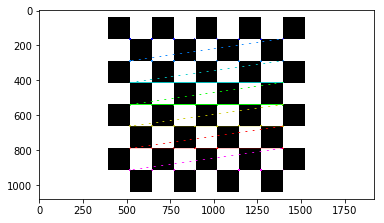

In [5]:
# Arrays to store object points and image points from all the images.
# objpoints = [] # 3d points in real world space
# projected_imgpoints = [] # 2d points in image plane.
chessboard_img_corners = []

pro_img_size = (10, 10)
img_size = (10, 10)


# Step through the list and search for chessboard corners
print('Start finding chessboard corners of depth image...')

img = cv2.imread('chessboard/02.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
pro_img_size = (img.shape[1], img.shape[0])

#Find the chessboard corners
print('find the chessboard corners of')
ret, chessboard_img_corners = cv2.findChessboardCorners(gray, (corner_x,corner_y), None)

# If found, add object points, image points
if ret == True:
#         projected_imgpoints.append(chessboard_img_corners)

    # Draw and display the corners
    cv2.drawChessboardCorners(img, (corner_x,corner_y), chessboard_img_corners, ret)
    plt.imshow(img)

In [6]:
RGB_mtx = np.mat([[913.24145912,   0.,         668.9538477  ],
 [  0.,         905.10342204, 389.24919723],
 [  0.,           0.,           1.        ]])

RGB_dist =  np.mat([[ 0.25755514, -0.92817129,  0.00150453,  0.01340316,  1.17293952]])


projector_mtx = np.mat([[2632.88528666,    0.,          753.71811534  ],
 [  0.,         2633.13459721,  611.01408057],
 [  0.,           0.,           1.        ]])

projector_dist =  np.mat([[ -0.64789326,   5.69455107,   0.02388628,  -0.00882401, -18.6186877 ]])


find the chessboard corners of


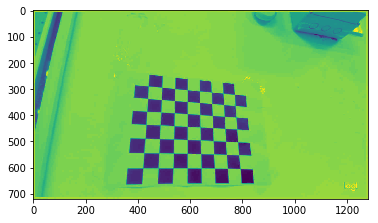

In [15]:
_img = cv2.imread('printed_chessboard/2/00.jpg')
_gray = cv2.cvtColor(_img, cv2.COLOR_BGR2GRAY)
plt.imshow(_gray)

#Find the chessboard corners
print('find the chessboard corners of')
ret, _printed_corners = cv2.findChessboardCorners(_gray, (corner_x,corner_y), None)

if ret:
    retval, _rvec, _tvec = cv2.solvePnP(objp, _printed_corners, RGB_mtx, RGB_dist)


find the chessboard corners of
[[ 3.5575607  -0.35195395  0.        ]
 [ 5.960924   -0.5237392   0.        ]
 [ 8.319962   -0.4484356   0.        ]
 [10.66427    -0.5624279   0.        ]
 [12.898384   -0.59851915  0.        ]
 [15.094845   -0.67432624  0.        ]
 [17.246902   -0.7367786   0.        ]
 [19.323318   -0.84212244  0.        ]
 [ 3.3996434   2.0311866   0.        ]
 [ 5.8498287   1.9067345   0.        ]
 [ 8.236455    1.8849999   0.        ]
 [10.544823    1.7640439   0.        ]
 [12.832478    1.6953313   0.        ]
 [15.077804    1.5363688   0.        ]
 [17.25513     1.5266107   0.        ]
 [19.431286    1.4334855   0.        ]
 [ 3.2288628   4.417287    0.        ]
 [ 5.7169156   4.275569    0.        ]
 [ 8.100822    4.3234153   0.        ]
 [10.511724    4.139464    0.        ]
 [12.786279    4.083196    0.        ]
 [15.118412    3.8518426   0.        ]
 [17.319399    3.7094429   0.        ]
 [19.43771     3.6205387   0.        ]
 [ 3.0961766   6.9732566   0.    

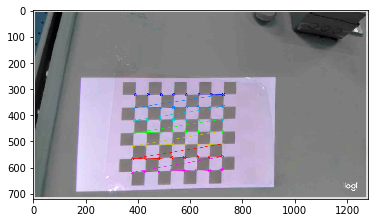

In [16]:
projected_objpoints = []
projected_imgpoints = []
camera_imgpoints = []     
img = cv2.imread('projected_chessboard/2/00.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

#Find the chessboard corners
print('find the chessboard corners of')
ret, projected_corners = cv2.findChessboardCorners(gray, (corner_x,corner_y), None)
# If found, add object points, image points
if ret == True:
    projected_obj = np.zeros((56,3), dtype=np.float32)
    #projected points in RGB image space to would coord
    for i in range(56):
        #對應點找反==>反過來放 55-i 
        projected_obj[55-i,:] = calculate_XYZ(projected_corners[i,0,0], projected_corners[i,0,1], _rvec, _tvec, RGB_mtx)


    print(projected_obj)
    projected_objpoints.append(projected_obj)

    projected_imgpoints.append(chessboard_img_corners)
    camera_imgpoints.append(projected_corners)

#         print(chessboard_img_corners)
#         print(projected_corners)
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (corner_x,corner_y), projected_corners, ret)
    plt.imshow(img)

In [17]:
print('=== Result ===')
ret, depth_cam_int, depth_cam_dist, RGB_cam_int, RGB_cam_dist, depth_rgb_rmat, depth_rgb_tvec, E, F = cv2.stereoCalibrate(
    projected_objpoints, camera_imgpoints, projected_imgpoints, RGB_mtx, RGB_dist, projector_mtx, projector_dist, None)

print('  RMS :', ret)
print('  RGB Camera intrinsic parameters :')
print(depth_cam_int, '    ')
print('  RGB Camera distortion parameters :')
print(depth_cam_dist, '    ')
print()
print('  Projector intrinsic parameters :')
print(RGB_cam_int, '    ')
print('  Projector distortion parameters :')
print(RGB_cam_dist, '    ')
print()
print('  Rotation matrix / translation vector from RGB camera to Projector')
print('  (they translate points from RGB camera coord to Projector coord) :')
print(depth_rgb_rmat, '    ')
print(depth_rgb_tvec, '    ')
print()
print('Rotation vector')
v,_ = cv2.Rodrigues(depth_rgb_rmat)
print(v)

=== Result ===
  RMS : 2.2564557889024672
  RGB Camera intrinsic parameters :
[[913.24145912   0.         668.9538477 ]
 [  0.         905.10342204 389.24919723]
 [  0.           0.           1.        ]]     
  RGB Camera distortion parameters :
[[ 0.25755514 -0.92817129  0.00150453  0.01340316  1.17293952]]     

  Projector intrinsic parameters :
[[2632.88528666    0.          753.71811534]
 [   0.         2633.13459721  611.01408057]
 [   0.            0.            1.        ]]     
  Projector distortion parameters :
[[ -0.64789326   5.69455107   0.02388628  -0.00882401 -18.6186877 ]]     

  Rotation matrix / translation vector from RGB camera to Projector
  (they translate points from RGB camera coord to Projector coord) :
[[ 0.97362852  0.02975855  0.22619005]
 [ 0.00771242  0.98659613 -0.16299879]
 [-0.22800883  0.16044474  0.96034861]]     
[[-1.1546153 ]
 [ 2.30994561]
 [ 2.98114194]]     

Rotation vector
[[ 0.1638972 ]
 [ 0.23015432]
 [-0.01117135]]
